In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


In [2]:
#import CSV file
df = pd.read_csv('Resources/Data/winequality-white.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.drop_duplicates(keep= 'first', inplace = False)
df.dropna(axis = 'columns', how='all')
df.reset_index(drop =True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.shape

(4898, 12)

In [6]:
#Features for Quality
bins = [2,6,9]
labels = ['Fair', 'Very Good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels) 
    

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Fair
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Fair
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Fair
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Fair
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Fair


In [8]:
# Assign X (factors) and y (quality)
X = df.drop("quality", axis=1)
y = df["quality"]
print(X.shape, y.shape)

(4898, 11) (4898,)


In [9]:
df['quality'].value_counts()

Fair         3838
Very Good    1060
Name: quality, dtype: int64

In [10]:
#Top5Features
top5_features= X[['alcohol', 'density', 'residual sugar', 'free sulfur dioxide', 'pH']]

### All Features

In [11]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

# Split our data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [12]:
for data in [y_train, y_test]:
    print(data.describe())

count     3918
unique       2
top       Fair
freq      3085
Name: quality, dtype: object
count      980
unique       2
top       Fair
freq       753
Name: quality, dtype: object


In [13]:
#Create a Logistic Regression Model

classifier = LogisticRegression()
classifier

LogisticRegression()

In [14]:
 classifier.fit(x_train, y_train)

LogisticRegression()

In [15]:
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.8060234813680449
Testing Data Score: 0.786734693877551


In [16]:
predictions = classifier.predict(x_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair']
First 10 Actual labels: ['Very Good', 'Very Good', 'Very Good', 'Fair', 'Very Good', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair']


In [17]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Fair,Very Good
1,Fair,Very Good
2,Fair,Very Good
3,Fair,Fair
4,Fair,Very Good
...,...,...
975,Fair,Fair
976,Fair,Fair
977,Fair,Fair
978,Fair,Fair


In [18]:
print(classification_report(predictions,y_test ))

              precision    recall  f1-score   support

        Fair       0.94      0.81      0.87       870
   Very Good       0.28      0.58      0.38       110

    accuracy                           0.79       980
   macro avg       0.61      0.70      0.63       980
weighted avg       0.87      0.79      0.82       980



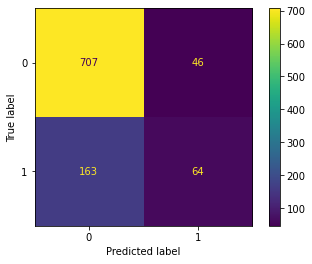

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('Resources/images/red_all_features_confu_KNN.jpg')

### Top 5 Features

In [20]:
x = df[top5_features.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

# Split our data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [21]:
for data in [y_train, y_test]:
    print(data.describe())

count     3918
unique       2
top       Fair
freq      3085
Name: quality, dtype: object
count      980
unique       2
top       Fair
freq       753
Name: quality, dtype: object


In [22]:
#Create a Logistic Regression Model

classifier = LogisticRegression()
classifier

LogisticRegression()

In [23]:
 classifier.fit(x_train, y_train)

LogisticRegression()

In [24]:
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.8044920877998979
Testing Data Score: 0.7928571428571428


In [25]:
predictions = classifier.predict(x_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Fair' 'Very Good' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair' 'Fair'
 'Fair']
First 10 Actual labels: ['Very Good', 'Very Good', 'Very Good', 'Fair', 'Very Good', 'Fair', 'Fair', 'Fair', 'Fair', 'Fair']


In [26]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Fair,Very Good
1,Very Good,Very Good
2,Fair,Very Good
3,Fair,Fair
4,Fair,Very Good
...,...,...
975,Fair,Fair
976,Fair,Fair
977,Fair,Fair
978,Fair,Fair


In [27]:
print(classification_report(predictions,y_test ))

              precision    recall  f1-score   support

        Fair       0.95      0.81      0.88       886
   Very Good       0.26      0.63      0.37        94

    accuracy                           0.79       980
   macro avg       0.61      0.72      0.62       980
weighted avg       0.89      0.79      0.83       980



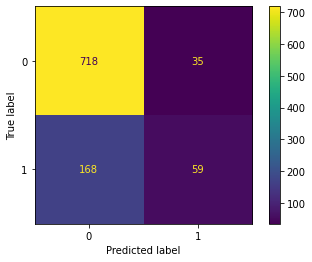

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('Resources/images/red_top5_features_confu_KNN.jpg')